In [1]:
from custompackage.load_data import *
from custompackage.load_architecture import *
from custompackage.traintestloop import *

import torch
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.nn as nn
import numpy as np
import math
import torchvision
from torchvision import transforms
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import matplotlib
import matplotlib.pyplot as plt
from torch.optim.optimizer import required
from torch.utils.data.dataset import random_split
import scipy
import os
import glob
import pandas as pd
import pickle

%matplotlib inline

In [4]:
# Select Class Set
class_set = 3

# Initialize settings
bs = 256
weighting = 'paired'
trials = 10
epochs = 10
# trees_set = [1,2,4,8,16,32]
trees_set = [8]


classes = np.load('./results/20200504/classes.npy', allow_pickle=True)

if class_set == 0:
    classes = classes[0:2] # mnist fmnist
elif class_set == 1:
    classes = classes[2:4] # kmnist emnist
elif class_set == 2:
    classes = classes[4:6] # svhn usps
else:
    classes = classes[6].reshape(1,-1)


loss = np.zeros((len(classes), trials, len(trees_set)))
acc = np.zeros((len(classes), trials, len(trees_set)))

    
for j, (t1, t2, ds) in enumerate(classes):
    print(t1, t2, ds)
    trainloaders, validloaders, testloader = dataset_weighted_split_all(bs, t1, t2, weighting, trials, ds, permute=True)
    for i in range(trials):
        for k, trees in enumerate(trees_set):
            print(j, i, k)
            model = ktree_gen(ds=ds, Repeats=trees, Padded=True).cuda()


            
            loss_curve, acc_curve, loss[j,i,k], acc[j,i,k], model_t= train_test_ktree(model, trainloaders[i],
                                                                                  testloader, epochs = epochs, randorder=False)
            break
        break
    break
    
#             np.save('./results/20200504/k_tree_acc_'+str(class_set)+'.npy', acc)
#             np.save('./results/20200504/k_tree_loss_'+str(class_set)+'.npy', loss)


2 3 cifar10
Files already downloaded and verified
Files already downloaded and verified
0 0 0
Finished Training, 100 epochs
Accuracy of the network on the test images: 58.200000 %


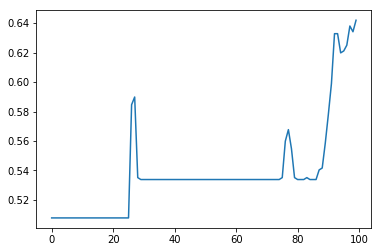

In [5]:
plt.plot(acc_curve)

In [25]:
### Start Collecting

In [41]:
paired_test = np.load('./results/20200509/confused_pairs_all.npy')

print(paired_test.shape)

ds = 0
pt_mean = np.mean(paired_test, axis=1)

ds_set = ['mnist', 'fmnist', 'kmnist','svhn','usps', 'cifar10']

classes = []

paired_test
for i, ds in enumerate(ds_set):
    focus = pt_mean[i]

    a = np.min(focus[np.nonzero(focus)])
    b = np.sort(focus[np.nonzero(focus)])
    e = b[len(b)-2]
    c = np.where(focus == a)
    d = np.where(focus == e)

    classes.append([c[0][0], c[1][0], ds, a, d[0][0], d[1][0], e])

classes = np.array(classes, dtype=object)
classes_orig = classes
print(classes)
# np.save('./results/20200511/classes.npy', classes[:,:3], allow_pickle=True)

# np.load('./results/20200511/classes.npy', allow_pickle=True)

paired_test = np.load('./results/20200509/confused_pairs_emnist_upper.npy')
paired_test.shape

pt_mean = np.mean(paired_test, axis=1)

ds_set = ['emnist']
classes = []
for i, ds in enumerate(ds_set):
    focus = pt_mean[i]

    a = np.min(focus[np.nonzero(focus)])
    print(a)
    b = np.sort(focus[np.nonzero(focus)])
    e = b[len(b)-2]
    c = np.where(focus == a)
    d = np.where(focus == e)
    
    classes.append([c[0][0]+10, c[1][0]+10, ds, a, d[0][0]+10, d[1][0]+10, e ])

classes = np.array(classes, dtype=object)

print(classes)
# intermed = np.concatenate((class_orig, classes), 0)
# np.save('./results/20200511/classes_emnist_perf.npy', intermed, allow_pickle=True)
# np.save('./results/20200511/classes.npy', classes, allow_pickle=True)

# classes_orig = np.load('./results/20200511/classes.npy', allow_pickle=True)
print(classes_orig.shape, classes[:,:].shape)
classes_final = np.concatenate((classes_orig[:,:3],classes[:,:3]),0)
a = classes_final[3:6].copy()
b = classes_final[6].copy()
classes_final[3] = b
classes_final[4:] = a

print(classes_final)
# # np.save('./results/20200511/classes.npy', classes_final, allow_pickle=True)

(6, 10, 10, 10)
[[3 5 'mnist' 0.8772344900105151 0 4 0.9688073394495413]
 [0 6 'fmnist' 0.67095 2 9 0.9676]
 [2 6 'kmnist' 0.68395 0 1 0.86295]
 [5 6 'svhn' 0.5153634487502866 1 9 0.6535255452644159]
 [3 5 'usps' 0.8429447852760736 0 9 0.9570895522388059]
 [3 5 'cifar10' 0.5216999999999998 6 8 0.749]]
0.5707725947521867
[[14 17 'emnist' 0.5707725947521867 21 24 0.9814941602899717]]
(6, 7) (1, 7)
[[3 5 'mnist']
 [0 6 'fmnist']
 [2 6 'kmnist']
 [14 17 'emnist']
 [5 6 'svhn']
 [3 5 'usps']
 [3 5 'cifar10']]
